<a href="https://colab.research.google.com/github/slanucha/deep_learning_colab/blob/master/CIFAR_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

Data

In [2]:
cifar = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
X_train, X_test = X_train / 255.0, X_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
K = len(set(y_train))

Model

In [4]:
i = tf.keras.layers.Input(shape=X_train[0].shape)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(K, activation='softmax')(x)

model = tf.keras.models.Model(i, x)

In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
batch_size = 32
steps_per_epoch = X_train.shape[0] // batch_size

data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_train, batch_size)

In [7]:
#r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)
r = model.fit(train_generator, steps_per_epoch=steps_per_epoch, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1562/1562 [==============================] - 496s 318ms/step - loss: 1.4474 - accuracy: 0.4957 - val_loss: 1.3535 - val_accuracy: 0.5452
Epoch 2/10
1562/1562 [==============================] - 495s 317ms/step - loss: 0.9954 - accuracy: 0.6523 - val_loss: 0.9466 - val_accuracy: 0.6743
Epoch 3/10
1562/1562 [==============================] - 495s 317ms/step - loss: 0.8490 - accuracy: 0.7068 - val_loss: 0.7943 - val_accuracy: 0.7269
Epoch 4/10
1562/1562 [==============================] - 494s 316ms/step - loss: 0.7496 - accuracy: 0.7429 - val_loss: 0.6816 - val_accuracy: 0.7735
Epoch 5/10
1562/1562 [==============================] - 493s 316ms/step - loss: 0.6866 - accuracy: 0.7674 - val_loss: 0.6498 - val_accuracy: 0.7860
Epoch 6/10
1562/1562 [==============================] - 495s 317ms/step - loss: 0.6343 - accuracy: 0.7837 - val_loss: 0.5660 - val_accuracy: 0.8087
Epoch 7/10
1562/1562 [==============================] - 488s 313ms/step - loss: 0.5955 - accuracy: 0.7972 - val_

Results

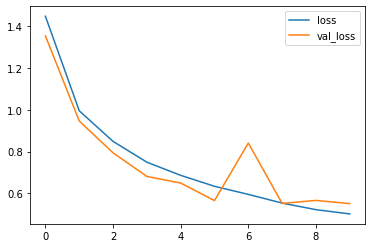

In [8]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

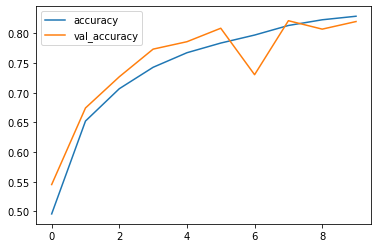

In [9]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [10]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function plots and prints confusion matrix.
    Normalization can be applied by setting `normalize=True`
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix.")
    else:
        print("Confusion matrix, without normalization")
        
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    tresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > tresh else 'black')
        
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()    

Confusion matrix, without normalization
[[843  11  39   7   2   0  16   8  59  15]
 [  3 939   1   0   2   0   3   0  24  28]
 [ 37   0 744  22  34  21 110   5  18   9]
 [ 16   6  53 603  50  90 119  14  30  19]
 [ 13   3  54  24 781   7  97   8  12   1]
 [  6   2  39 105  42 708  63  15   8  12]
 [  7   0  14  14   4   0 947   1  12   1]
 [ 10   3  22  23  57  25  22 818   8  12]
 [ 30  10   2   3   0   0   4   0 940  11]
 [ 23  62   3   3   2   2   3   3  22 877]]


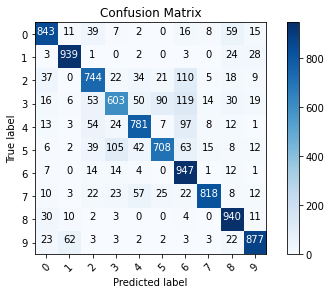

In [11]:
p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Predictions

In [12]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Text(0.5, 1.0, 'True label: deer, Predicted: bird')

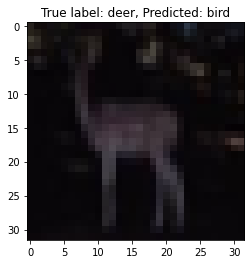

In [19]:
missclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(missclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s, Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))